In [10]:
# imports
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
from spotify_data import grouped_data as data, categorical_columns, string_columns

response_variable = 'track_genre'
categorical_columns = [x for x in categorical_columns if x != response_variable]

# drop string columns and response variable
X = data.drop(columns=[response_variable, *string_columns])
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)
scaler = StandardScaler()
X = scaler.fit_transform(X)
Y = data[response_variable]

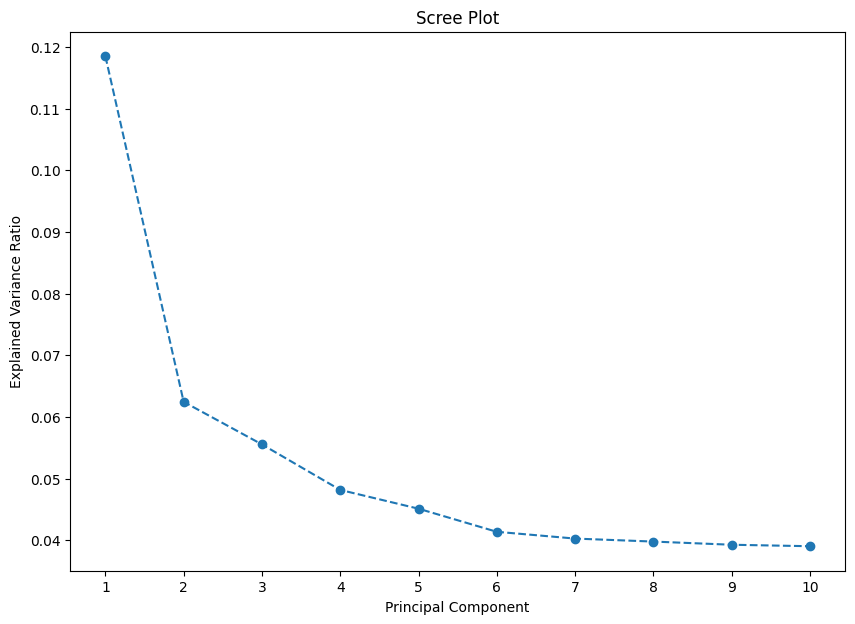

In [4]:
# do PCA on X
n_components = 10
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i}' for i in range(n_components)])

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 7))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()

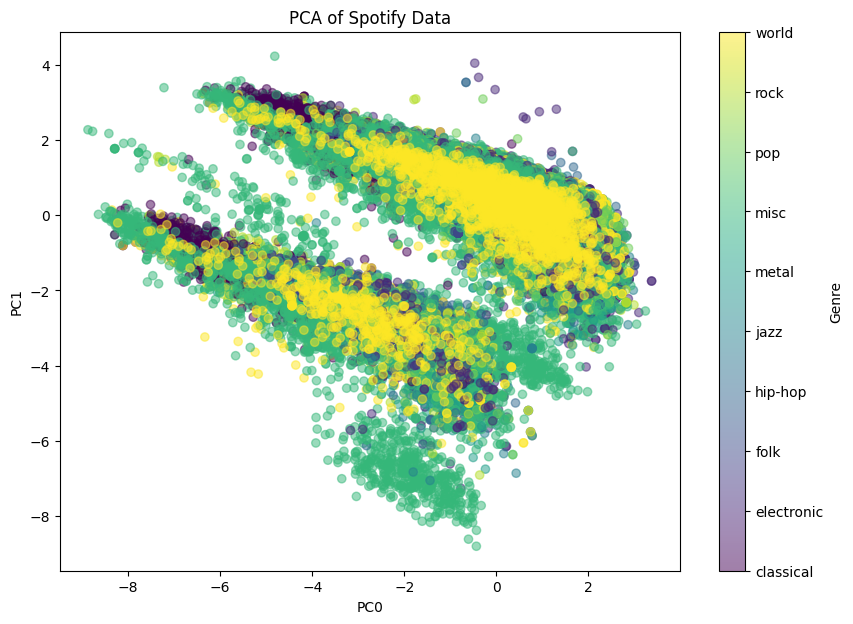

In [ ]:
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

# plot the first two principal components
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    X_pca_df['PC0'],
    X_pca_df['PC1'],
    c=Y_encoded,
    cmap='viridis',
    alpha=0.5
)
# label by Y_encoded
cbar = plt.colorbar(scatter)
cbar.set_label('Genre')
cbar.set_ticks(range(len(label_encoder.classes_)))
cbar.set_ticklabels(label_encoder.classes_)


plt.xlabel('PC0')
plt.ylabel('PC1')
plt.title('PCA of Spotify Data')
plt.show()


Accuracy: 0.3161842105263158


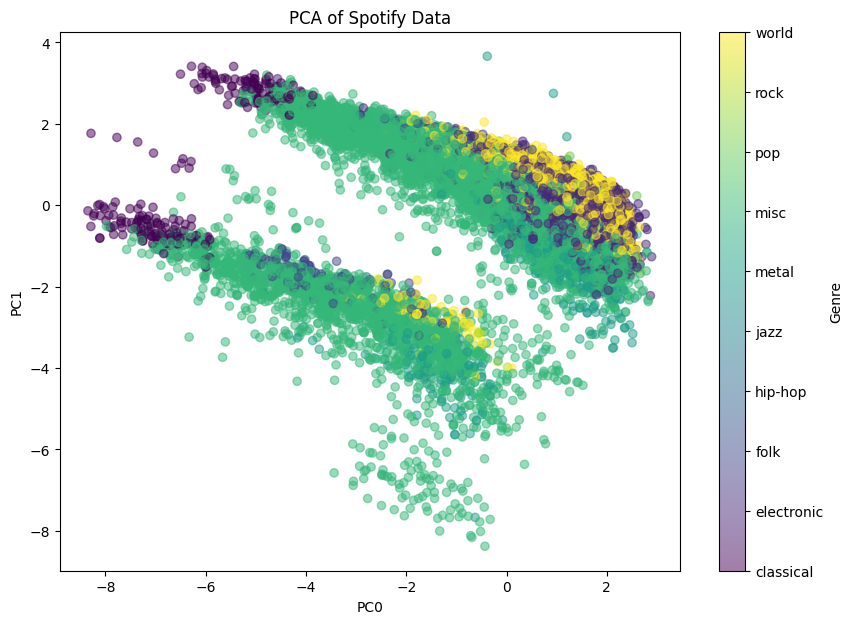

In [22]:
# do a regression using PCA transformed data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X_pca_df, Y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
Y_pred_encoded = label_encoder.transform(Y_pred)

accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy}')

# plot it
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    X_test['PC0'],
    X_test['PC1'],
    c=Y_pred_encoded,
    cmap='viridis',
    alpha=0.5
)
# label by Y_encoded
cbar = plt.colorbar(scatter)
cbar.set_label('Genre')
cbar.set_ticks(range(len(label_encoder.classes_)))
cbar.set_ticklabels(label_encoder.classes_)
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.title('PCA of Spotify Data')
plt.show()

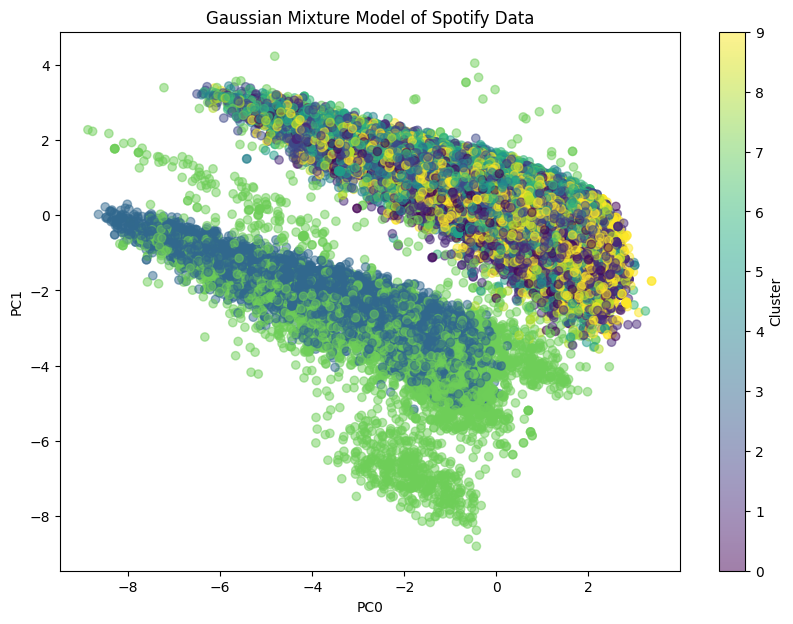

In [15]:
# gaussian mixture model
from sklearn.mixture import GaussianMixture
import numpy as np

n_components = 10
gmm = GaussianMixture(n_components=n_components)
gmm.fit(X_pca_df)
Y_pred = gmm.predict(X_pca_df)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    X_pca_df['PC0'],
    X_pca_df['PC1'],
    c=Y_pred,
    cmap='viridis',
    alpha=0.5
)
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')
cbar.set_ticks(range(n_components))
cbar.set_ticklabels(range(n_components))

plt.xlabel('PC0')
plt.ylabel('PC1')
plt.title('Gaussian Mixture Model of Spotify Data')
plt.show()


In [18]:
# evaluate the model
from sklearn.metrics import confusion_matrix, silhouette_score

sil_score = silhouette_score(X_pca_df, Y_pred)

In [19]:
print(sil_score)

0.1875504339310337


# Results

While the GMM has a pretty graph that almost looks right, the silhouette score is pretty bad!

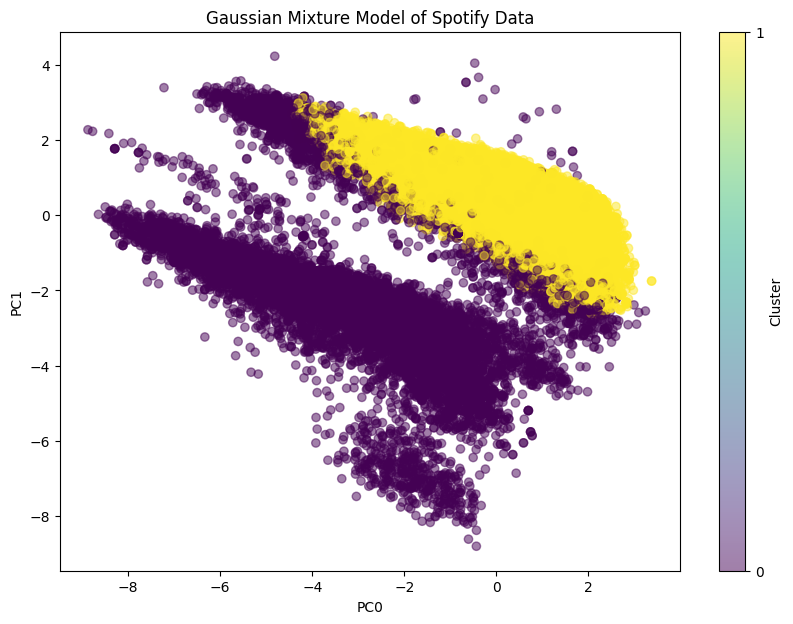

In [31]:
# Trying the data but with 2 classes: pop and other
Y_binary = Y.apply(lambda x: 'pop' if x == 'pop' else 'misc')

# do GMM
n_components = 2
gmm = GaussianMixture(n_components=n_components)
gmm.fit(X_pca_df)
Y_pred = gmm.predict(X_pca_df)


plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    X_pca_df['PC0'],
    X_pca_df['PC1'],
    c=Y_pred,
    cmap='viridis',
    alpha=0.5
)
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')
cbar.set_ticks(range(n_components))
cbar.set_ticklabels(range(n_components))

plt.xlabel('PC0')
plt.ylabel('PC1')
plt.title('Gaussian Mixture Model of Spotify Data')
plt.show()


In [37]:
# Evaluate
Y_binary_encoded = label_encoder.transform(Y_binary).reshape(-1, 1)
sil_score = silhouette_score(Y_binary_encoded, Y_pred)

In [38]:
print(sil_score)

-0.309445275785572


# It did not work!